<a href="https://colab.research.google.com/github/udayameister/Connectome/blob/main/Fraud_Detection_Intro_to_NN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to Neural Networks - Fraud Detection

Nilson reports that U.S. card fraud (credit, debt, etc) was reportedly \$9 billion in 2016 and expected to increase to \$12 billion by 2020. For perspective, in 2017 both PayPal's and Mastercard's revenue was only $10.8 billion each.


**Objective:** In this notebook, given the credit card transactions, we will build a simple neural network (i.e., Multilayer perceptrons) for Fraud Detection using Keras.

This notebooks covers,

1. Creating a Model

2. Adding Layers

3. Activations

4. Optimizers and Loss functions

5. Evaluation

### Dataset Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
dataset_file = '/content/creditcard.csv'

In [8]:
data = pd.read_csv(dataset_file)

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data = data.drop("Time", axis = 1)

In [10]:
data = data.dropna()

In [11]:
X_data = data.iloc[:, :-1]

In [12]:
X_data.shape

(5973, 29)

In [13]:
X_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [14]:
y_data = data.iloc[:, -1]

In [15]:
y_data.shape

(5973,)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [17]:
X_train = preprocessing.normalize(X_train)

In [18]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4778, 29)
(1195, 29)
(4778,)
(1195,)


### 1. Creating a model

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

Ref: https://keras.io/models/sequential/


In [20]:
model = Sequential()

### 2. Adding layers [layers and activations]

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

Ref: https://keras.io/layers/core/

In [21]:
model.add(Dense(64, input_shape = (29,), activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

### 3. Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

Ref (optimizers): https://keras.io/optimizers/

Ref (losses): https://keras.io/losses/


In [22]:
sgd = optimizers.Adam(lr = 0.001)

In [23]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

### 4. Summary of the model

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1920      
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2241 (8.75 KB)
Trainable params: 2113 (8.25 KB)
Non-trainable params: 128 (512.00 Byte)
_________________________________________________________________


### 5.Training [Forward pass and Backpropagation]

Training the model

In [25]:
model.fit(X_train, np.array(y_train), batch_size = 700, epochs = 10, verbose = 1)

Epoch 1/10
7/7 [==============================] - 6s 6ms/step - loss: 0.8626 - accuracy: 0.5753
Epoch 2/10
7/7 [==============================] - 0s 4ms/step - loss: 0.7922 - accuracy: 0.5705
Epoch 3/10
7/7 [==============================] - 0s 4ms/step - loss: 0.7526 - accuracy: 0.5969
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6835 - accuracy: 0.6697
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.7091
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.6192 - accuracy: 0.7321
Epoch 7/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7746
Epoch 8/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5526 - accuracy: 0.8112
Epoch 9/10
7/7 [==============================] - 0s 4ms/step - loss: 0.5212 - accuracy: 0.8311
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.4904 - accuracy: 0.8614


### 6. Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

Ref (metrics): https://keras.io/metrics/

In [26]:
X_test = preprocessing.normalize(X_test)

In [27]:
results = model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 1.0000


In [28]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.3754150867462158, 1.0]


### Confusion Matrix

In [29]:
Y_pred_cls = (model.predict(X_test) > 0.5).astype("int32") #model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

38/38 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 1.0000
Accuracy Model1 (Dropout): 1.0
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


array([[1195]])

In [30]:
Y_pred_cls

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [31]:
Y_pred_prob = model.predict(X_test).ravel()


38/38 [==============================] - 0s 2ms/step


In [32]:

precision, recall, thresholds_pr = precision_recall_curve(y_test, Y_pred_prob)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


In [33]:
AUC_PRcurve= auc(recall, precision)

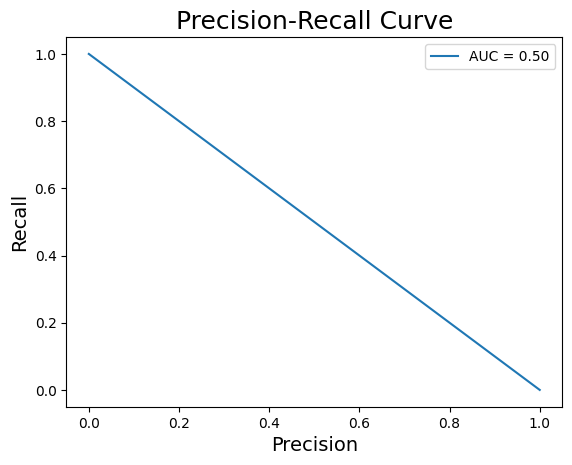

In [34]:

plt.figure(1)
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve))
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()